In [4]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file_path = "../../dataset/train_val_test_preprocessed.csv"
data = pd.read_csv(file_path)
data.head()


,sentiment,content
0,sadness,im feeling rather rotten im ambitious right
1,sadness,im updating blog feel shitty
2,sadness,never make separate ever want feel like ashamed
3,joy,left bouquet red yellow tulip arm feeling slig...
4,sadness,feeling little vain one


In [7]:
data = data.dropna(subset=['content'])

le = LabelEncoder()
data['encoded_sentiment'] = le.fit_transform(data['sentiment'])

X_train, X_test, y_train, y_test = train_test_split(
    data['content'], data['encoded_sentiment'], test_size=0.2, random_state=50
)

tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [8]:
logreg = LogisticRegression(random_state=0)
logreg.fit(X_train_tfidf, y_train)
logreg_pred = logreg.predict(X_test_tfidf)

/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

           0       0.92      0.83      0.87       539
           1       0.90      0.77      0.83       525
           2       0.84      0.95      0.90      1322
           3       0.85      0.68      0.75       302
           4       0.88      0.94      0.91      1159
           5       0.88      0.55      0.67       143

    accuracy                           0.87      3990
   macro avg       0.88      0.78      0.82      3990
weighted avg       0.87      0.87      0.87      3990



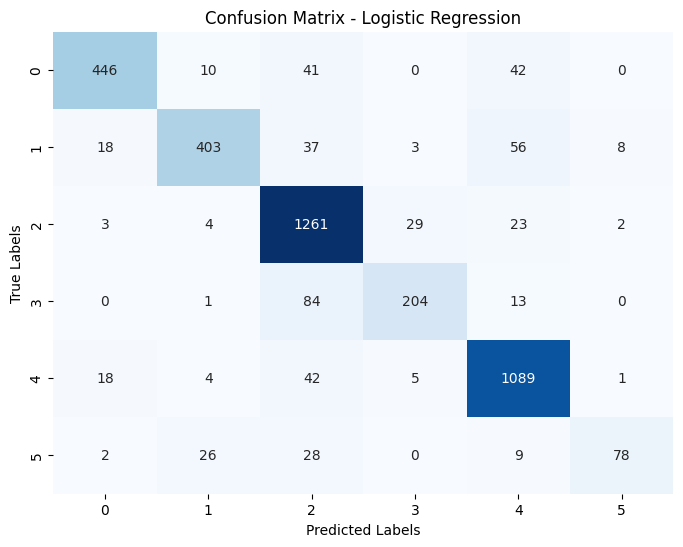

In [9]:
print(classification_report(y_test, logreg_pred, zero_division='warn'))
confusion_m = confusion_matrix(y_test, logreg_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_m, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()


In [10]:
accuracy = accuracy_score(y_test, logreg_pred)
precision = precision_score(y_test, logreg_pred, average='weighted', zero_division=1)
recall = recall_score(y_test, logreg_pred, average='weighted')
f1 = f1_score(y_test, logreg_pred, average='weighted')

print("Name: Logistic Regression")
print("Accuracy: {:.4f}".format(accuracy))
print("Precision: {:.4f}".format(precision))
print("Recall: {:.4f}".format(recall))
print("F1: {:.4f}".format(f1))

Name: Logistic Regression
Accuracy: 0.8724
Precision: 0.8742
Recall: 0.8724
F1: 0.8689
